# __E-commerce Sales Analysis: (Data Analysis Task)__
## __Task 7: Connect Database to Python and Perform Data Visualization__

### Importing Data and Required Packages

In [3]:
import mysql.connector
from pymysql import connect
from mysql.connector import Error
import pandas as pd

### Connecting MySQL Databases to Python

In [8]:
# Connecting MySQL Databases to Python and Cursor:
db = connect(host = "localhost", user = "root", password = "Drsdrp@007")
curs = db.cursor()
query = 'show databases'
curs.execute(query)
db=curs.fetchall()
for i in db:
    print(i)

('cinimas',)
('ecommerce_sales',)
('human',)
('info',)
('information_schema',)
('mysql',)
('performance_schema',)
('practiseecommerce_sales',)
('python_to_sql',)
('pytosql',)
('sakila',)
('students',)
('sys',)
('upgrad',)
('world',)


### Fetching Table from SQL Database

In [11]:
connectivity = connect(host = "localhost", user = "root", password = "Drsdrp@007", database = 'ecommerce_sales')
curs = connectivity.cursor()
query = 'show tables'
curs.execute(query)
data = curs.fetchall()
for x in data:
    print(x)

('customer_order_product_details',)
('customers',)
('orderdetails',)
('orders',)
('products',)


In [17]:
query = 'select * from customer_order_product_details'
print('No.of Rows in Table :',curs.execute(query))

No.of Rows in Table : 60


### Converting the SQL Data Table to DataFrame using Pandas

In [20]:
import pandas as pd
df=pd.read_sql(query,connectivity)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5864\2733075093.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connectivity)


In [82]:
print("E-Commerce Sales Data :")
print("="*150)
df.head()

E-Commerce Sales Data :


,customer_id,customer_name,email,join_date,order_id,order_date,order_detail_id,product_id,product_name,category,price,stock_quantity,quantity,total_price
0,1,John Doe,john1@example.com,2023-01-01,1,2023-01-01,1,1,Laptop,Electronics,999.99,50,1,999.99
1,2,Jane Smith,jane2@example.com,2023-01-02,2,2023-01-02,2,2,Smartphone,Electronics,499.99,100,2,999.98
2,3,Alice Johnson,alice3@example.com,2023-01-03,3,2023-01-03,3,3,Tablet,Electronics,299.99,75,1,299.99
3,4,Bob Brown,bob4@example.com,2023-01-04,4,2023-01-04,4,4,Headphones,Accessories,99.99,200,1,99.99
4,5,Charlie Davis,charlie5@example.com,2023-01-05,5,2023-01-05,5,5,Smartwatch,Accessories,199.99,150,1,199.99


In [24]:
print('No. of Rows and Columns =',df.shape)
print('-'*150)
print('Basic Information of the Data :')
df.info() # getting some basic information on the different fields

No. of Rows and Columns = (60, 14)
------------------------------------------------------------------------------------------------------------------------------------------------------
Basic Information of the Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      60 non-null     int64  
 1   customer_name    60 non-null     object 
 2   email            60 non-null     object 
 3   join_date        60 non-null     object 
 4   order_id         60 non-null     int64  
 5   order_date       60 non-null     object 
 6   order_detail_id  60 non-null     int64  
 7   product_id       60 non-null     int64  
 8   product_name     60 non-null     object 
 9   category         60 non-null     object 
 10  price            60 non-null     float64
 11  stock_quantity   60 non-null     int64  
 12  quantity         60 non-null  

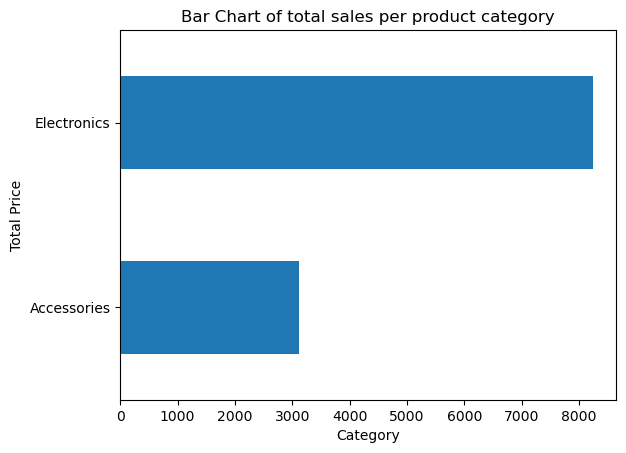

In [69]:
import matplotlib.pyplot as plt
# Group by 'category' and sum 'total_price'for bar chart
grouped_data = df.groupby('category')['total_price'].sum()
# Plotting the bar chart
grouped_data.plot(kind='barh')
plt.title('Bar Chart of total sales per product category')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.show()

## __Task 8: Perform Bivariate analysis__
### Let me know which two columns are highly dependent to each other using Chi2 and F_classif(ANOVA)

In [53]:
# Using Chi-Square Test :
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
label_encoders = {}
dfcopy = df.copy()
categorical_columns = ['product_name', 'category']

for i in categorical_columns:
    dfcopy[i] = label.fit_transform(dfcopy[i])
    label_encoders[i] = label

In [55]:
# Splitting Categorical and Numerical Data from the Data for Chi-Square Test :
categorical_data = dfcopy[categorical_columns]
numerical_data = dfcopy[['price', 'stock_quantity', 'quantity', 'total_price']]

In [57]:
categorical_data.tail()

,product_name,category
55,49,0
56,12,1
57,27,1
58,57,1
59,39,0


In [59]:
numerical_data.head()

,price,stock_quantity,quantity,total_price
0,999.99,50,1,999.99
1,499.99,100,2,999.98
2,299.99,75,1,299.99
3,99.99,200,1,99.99
4,199.99,150,1,199.99


## __>> Chi-Square Test__

In [104]:
from sklearn.feature_selection import chi2
target = dfcopy['quantity'] # Using 'price' as target for chi2
f_p_values=chi2(categorical_data,target)

In [106]:
f_p_values

(array([2.87683616, 0.68      ]), array([0.23730286, 0.71177032]))

In [108]:
p_values=pd.Series(f_p_values[1])
p_values.index=categorical_data.columns
print('P_values with quantity:')
p_values

P_values with quantity:


product_name    0.237303
category        0.711770
dtype: float64

##### __COMMENT :__
#### This indicates that the relationship between both categorical columns and quantity is not statistically significant (p-value > 0.05), implying that any observed association is likely due to random chance.

## __>> ANOVA (F_classif)__

__Target as Quantity :__

In [128]:
CatNum_Columns = dfcopy[['product_name', 'category','price', 'stock_quantity', 'quantity', 'total_price']]

In [130]:
x1 = CatNum_Columns
y = dfcopy['quantity']

In [144]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif, k=2)
fit = best_features.fit(x1,y)
selected_features = x1.columns[fit.get_support()]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [146]:
selected_features

Index(['stock_quantity', 'quantity'], dtype='object')

In [148]:
anova_stats, anova_p_values = f_classif(categorical_data, df['quantity'])
anova_results_cat = pd.DataFrame({'Feature': categorical_columns, 'F Stat': anova_stats, 'P-value': anova_p_values})

In [150]:
anova_results_cat

,Feature,F Stat,P-value
0,product_name,0.135041,0.873959
1,category,0.564684,0.571687


In [172]:
x2 = dfcopy[['price', 'stock_quantity', 'quantity', 'total_price']] # numercical columns

In [174]:
f_p_values=f_classif(x2,y)
f_p_values

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


(array([ 1.40399074, 17.68056044,         inf,  1.5346819 ]),
 array([2.53978965e-01, 1.06167437e-06, 0.00000000e+00, 2.24296226e-01]))

In [176]:
f_p_values=pd.Series(f_p_values[1])
f_p_values.index=x2.columns
f_p_values

price             0.253979
stock_quantity    0.000001
quantity          0.000000
total_price       0.224296
dtype: float64

In [178]:
best_features = SelectKBest(score_func=f_classif, k=2)
fit = best_features.fit(x,y)
selected_features = x.columns[fit.get_support()]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [180]:
selected_features

Index(['stock_quantity', 'quantity'], dtype='object')

__Target as Price :__

In [207]:
x2 = CatNum_Columns
y = dfcopy['price']

In [209]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func=f_classif, k=2)
fit = best_features.fit(x2,y)
selected_features = x1.columns[fit.get_support()]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [211]:
selected_features

Index(['price', 'total_price'], dtype='object')

In [213]:
anova_stats, anova_p_values = f_classif(categorical_data, df['quantity'])
anova_results_cat = pd.DataFrame({'Feature': categorical_columns, 'F Stat': anova_stats, 'P-value': anova_p_values})

In [215]:
anova_results_cat

,Feature,F Stat,P-value
0,product_name,0.135041,0.873959
1,category,0.564684,0.571687


In [225]:
x2 = dfcopy[['price', 'stock_quantity', 'quantity', 'total_price']] # numercical columns

In [227]:
f_p_values=f_classif(x2,y)
f_p_values

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


(array([        inf,  5.89827808,  1.31086793, 17.59001422]),
 array([0.00000000e+00, 1.23147413e-06, 2.30280561e-01, 8.58405526e-14]))

In [229]:
f_p_values=pd.Series(f_p_values[1])
f_p_values.index=x2.columns
f_p_values

price             0.000000e+00
stock_quantity    1.231474e-06
quantity          2.302806e-01
total_price       8.584055e-14
dtype: float64

In [231]:
best_features = SelectKBest(score_func=f_classif, k=2)
fit = best_features.fit(x,y)
selected_features = x.columns[fit.get_support()]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [233]:
selected_features

Index(['price', 'total_price'], dtype='object')

##### __COMMENT :__
#### In conclusion,
- The feature __stock_quantity__ stands out as being significantly related to __quantity__ among all the features__
- The __stock_quantity__ shows a statistically significant relationship with __price__, as indicated by its very low p-value.
- The __total_price__ shows a statistically significant relationship with __price__, as indicated by its very low p-value.

## __DATA VISUALIZATIONS :__

In [247]:
# Correlation Visuals for all Columns :
Correlation_matrix = CatNum_Columns
corr = Correlation_matrix.corr()
corr

,product_name,category,price,stock_quantity,quantity,total_price
product_name,1.000000,-0.147381,-0.214020,-0.010637,0.026311,-0.200756
category,-0.147381,1.000000,0.502346,-0.448531,-0.127634,0.531474
price,-0.214020,0.502346,1.000000,-0.470054,-0.207050,0.919310
stock_quantity,-0.010637,-0.448531,-0.470054,1.000000,0.501954,-0.426908
quantity,0.026311,-0.127634,-0.207050,0.501954,1.000000,0.016392
total_price,-0.200756,0.531474,0.919310,-0.426908,0.016392,1.000000


<Axes: >

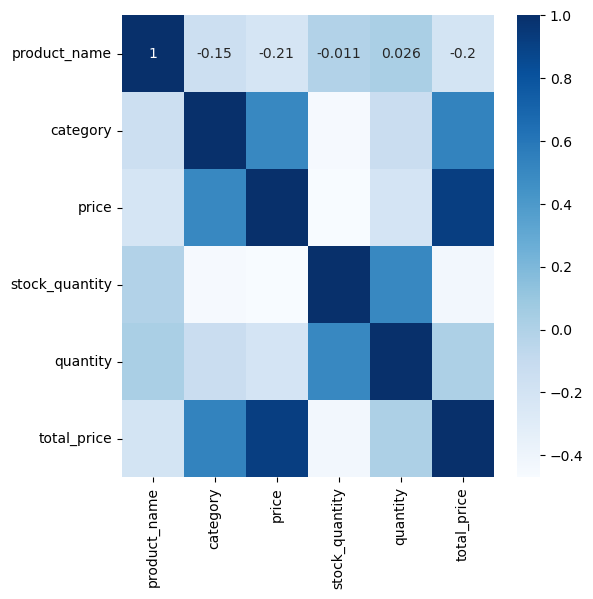

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="Blues")

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

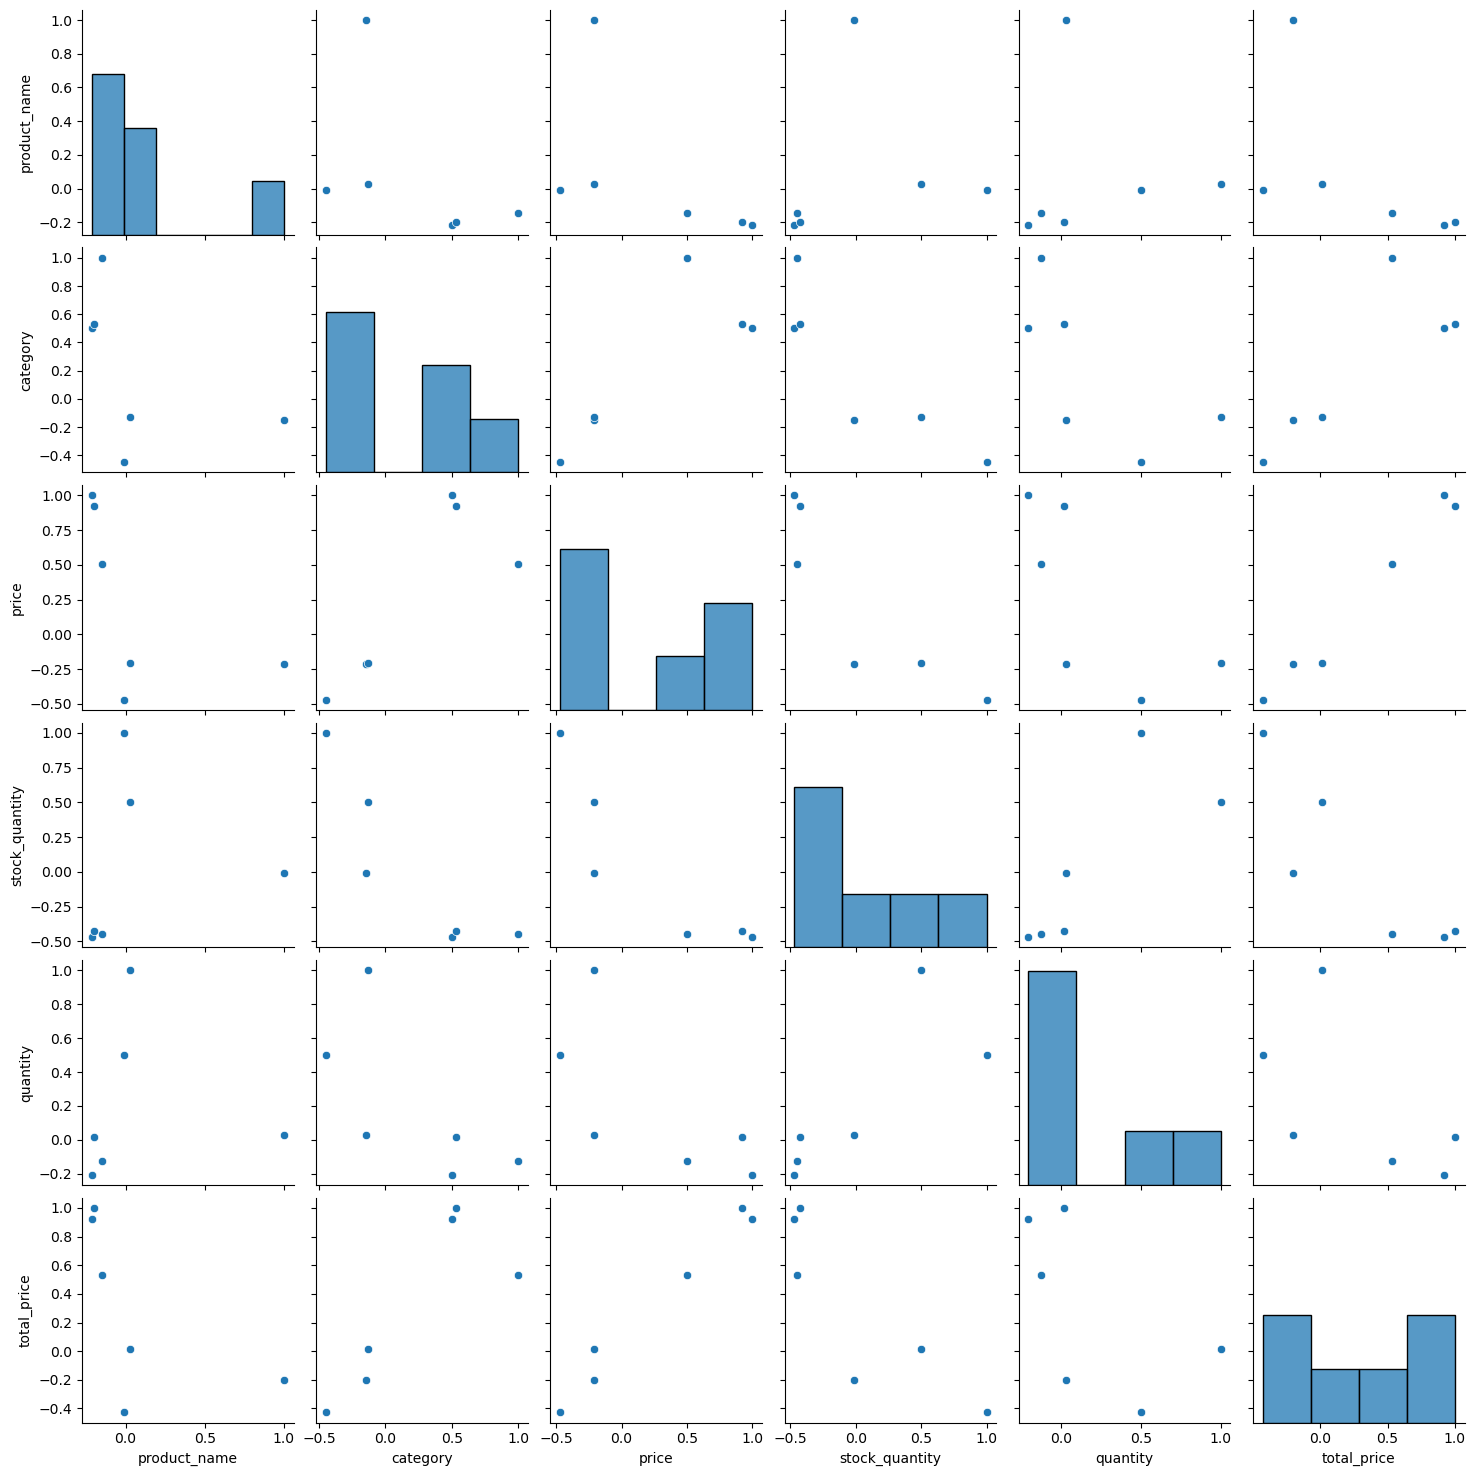

In [251]:
sns.pairplot(corr)

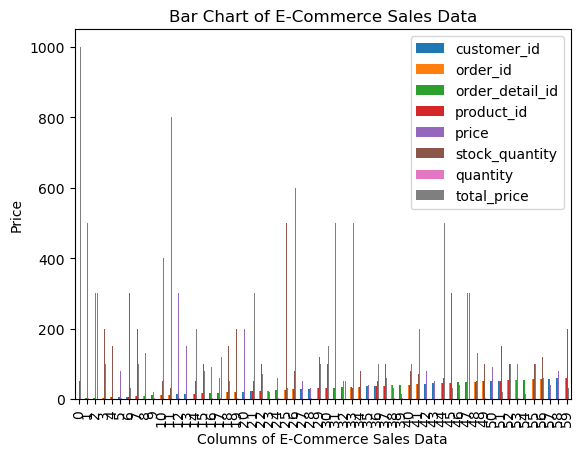

In [253]:
# Bar Chart if E-Commerce Sales Data :
df.plot(kind='bar')
plt.title('Bar Chart of E-Commerce Sales Data')
plt.xlabel('Columns of E-Commerce Sales Data')
plt.ylabel('Price')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


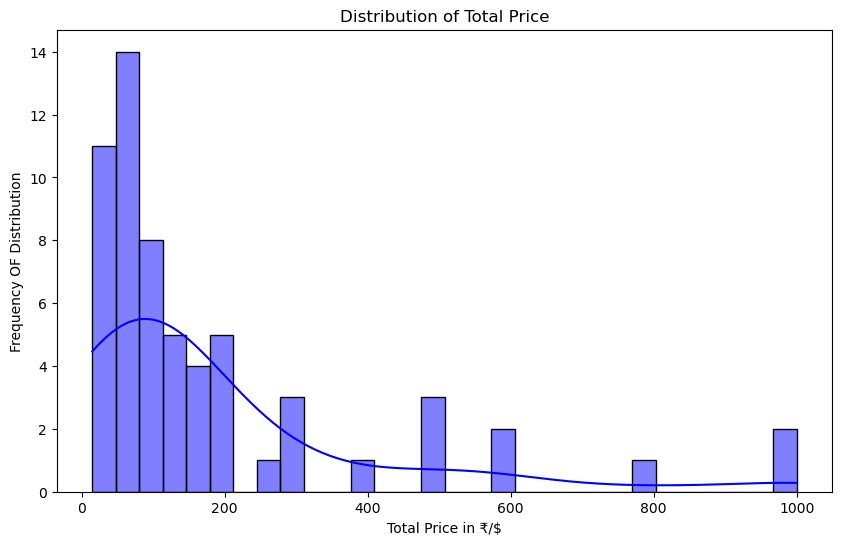

In [255]:
# Plotting the distribution of total_prices WITH HISTOGRAPH :
plt.figure(figsize=(10, 6))
sns.histplot(df['total_price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price in ₹/$')
plt.ylabel('Frequency OF Distribution')
plt.show()

### Charts for Chi-Square Test

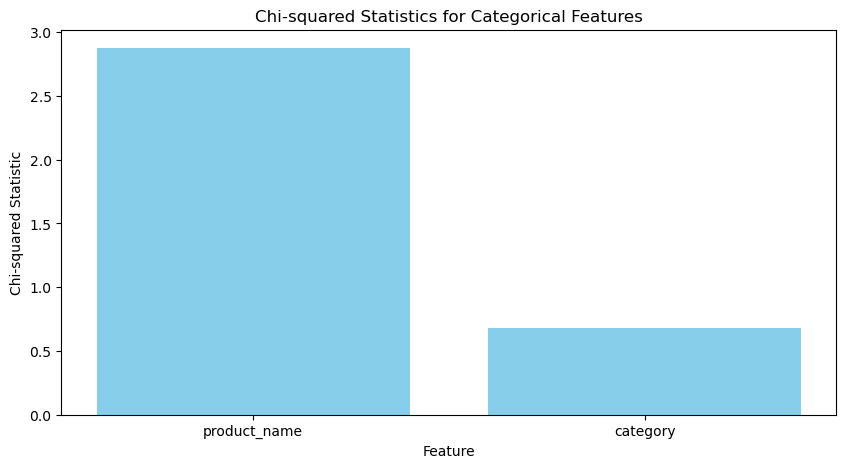

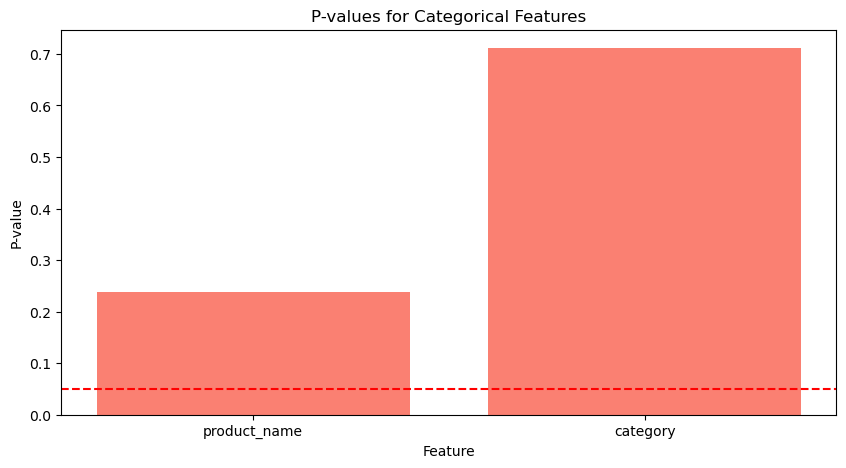

In [266]:
# Provided results
features = ['product_name', 'category']
chi2_stats = [2.87683616, 0.68]
p_values = [0.23730286, 0.71177032]

# Plotting Chi-squared Statistics
plt.figure(figsize=(10, 5))
plt.bar(features, chi2_stats, color='skyblue')
plt.title('Chi-squared Statistics for Categorical Features')
plt.xlabel('Feature')
plt.ylabel('Chi-squared Statistic')
plt.show()

# Plotting P-values
plt.figure(figsize=(10, 5))
plt.bar(features, p_values, color='salmon')
plt.axhline(y=0.05, color='r', linestyle='--')  # Significance level
plt.title('P-values for Categorical Features')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.show()

### Charts for ANOVA(Classif) Test

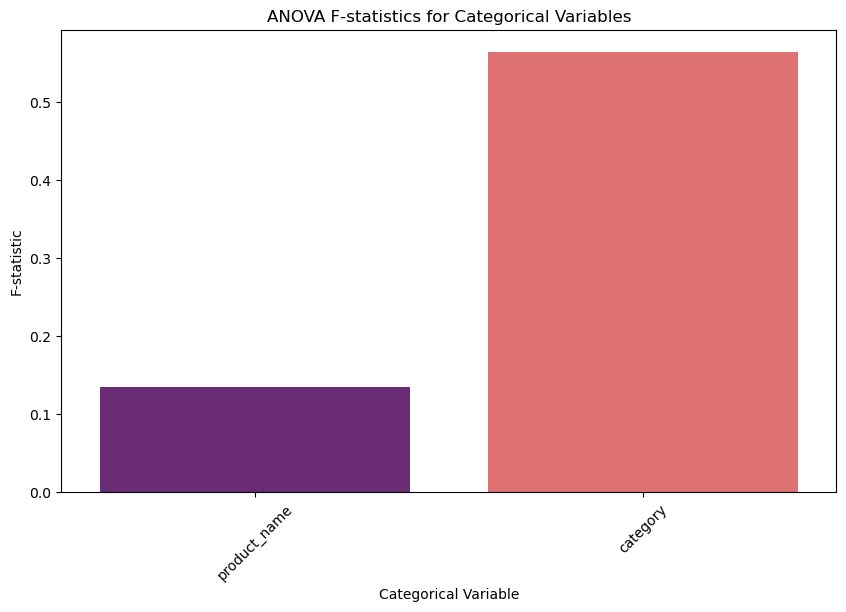

In [271]:
anova_stats, _ = f_classif(categorical_data, target)

# Create bar plots for ANOVA F-test results
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_data.columns, y=anova_stats, palette='magma')
plt.title('ANOVA F-statistics for Categorical Variables')
plt.ylabel('F-statistic')
plt.xlabel('Categorical Variable')
plt.xticks(rotation=45)
plt.show()

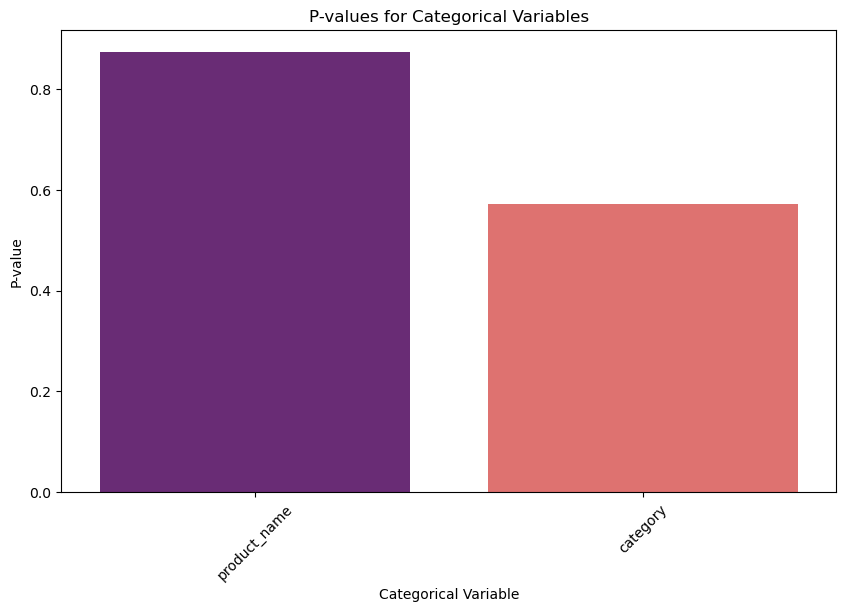

In [273]:
anova_stats, p_values = f_classif(categorical_data, target)

plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_data.columns, y=p_values, palette='magma')
plt.title('P-values for Categorical Variables')
plt.ylabel('P-value')
plt.xlabel('Categorical Variable')
plt.xticks(rotation=45)
plt.show()

In [275]:
# Correlation Visualization for Numerical Data:
df_corr = dfcopy[['price', 'stock_quantity', 'quantity', 'total_price']]
corr = df_corr.corr()
corr

,price,stock_quantity,quantity,total_price
price,1.000000,-0.470054,-0.207050,0.919310
stock_quantity,-0.470054,1.000000,0.501954,-0.426908
quantity,-0.207050,0.501954,1.000000,0.016392
total_price,0.919310,-0.426908,0.016392,1.000000


<Axes: >

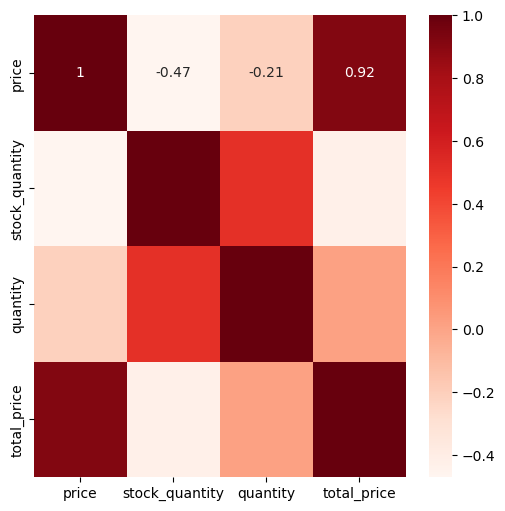

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_corr.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="Reds")

## __FINAL Task : Data Story Telling__